In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.61601114,  0.56326212],
       [ 0.07315831,  1.38386547],
       [ 0.5108795 ,  0.5042075 ],
       ...,
       [ 0.09693941,  1.79545825],
       [-0.9402662 ,  0.73147613],
       [-0.0889412 ,  1.29787539]])

In [5]:
y

array([ 2.44526729e+01,  6.14918418e+01,  2.27934163e+01,  1.91852469e+01,
       -9.51777322e+01, -2.09004501e+01, -1.53015527e+01, -1.86794745e+01,
        7.30372934e+00,  5.33138032e+01, -5.67229116e+01,  2.04821348e+01,
        5.29987830e-02, -4.70522581e+01,  3.56572733e+01, -3.95827913e+01,
        4.66660234e+00,  6.74617755e-01,  5.48310657e+00, -2.70747286e+01,
        3.55530340e+01,  2.32040893e+01, -1.12647506e+01, -2.49133788e+01,
        3.28739365e+01, -3.92208739e+01, -2.22035555e+01,  5.10168704e+01,
       -2.99245739e+00, -7.47011707e+00, -2.17515438e+01,  6.15468593e+01,
       -5.53645985e+00,  1.50114768e+01,  9.91775170e+01, -7.09352552e+00,
       -6.36840329e+01, -6.64070544e+01,  5.74081605e+01, -8.02124271e+01,
       -2.07600929e+01, -7.25515973e+01, -1.59713042e+01,  3.50318086e+01,
        3.52939226e+01, -6.84817239e+01, -6.19026203e+01, -6.68497385e+00,
        9.09076248e+01, -1.26345489e+02,  8.47519830e+01, -4.98260815e+01,
       -5.71616805e+01,  

In [8]:
pd.DataFrame(X)[0]

0      0.616011
1      0.073158
2      0.510879
3     -1.354238
4     -0.076255
         ...   
995   -0.600737
996    0.417200
997    0.096939
998   -0.940266
999   -0.088941
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

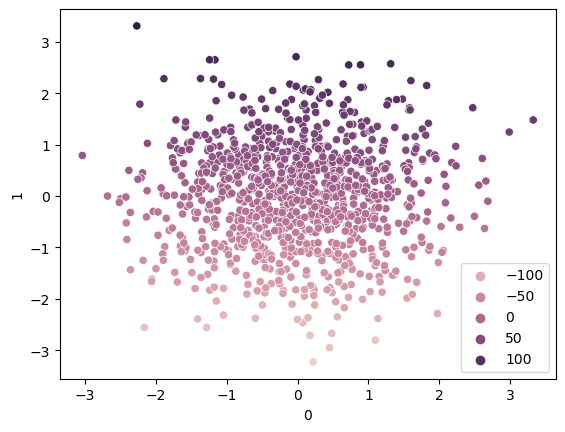

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.025,random_state=10)

In [15]:
from sklearn.svm import SVR

In [16]:
svr = SVR(kernel='linear')

In [18]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [19]:
svr.coef_

array([[ 3.14866193, 45.10351956]])

In [20]:
y_pred = svr.predict(X_test)

In [21]:
y_pred

array([-86.45049718, -12.31346566, -47.46760959,  -4.07747939,
        32.87783205, -36.92943451,  13.78359591,  28.76873874,
        24.23561556,  47.66438624,  41.43222693,   4.03938318,
        25.89374384, -13.97577708,  22.38406817, -58.88236558,
        27.59764391,  -5.70874423, -15.2566754 ,  44.27813212,
        33.35887133, -20.00372207,  19.45135865, -10.04105568,
        66.87581672])

In [22]:
from sklearn.metrics import r2_score

In [23]:
print(r2_score(y_test,y_pred))

0.9915816760003309


Hyperparameter Tuning With SVC

In [29]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
             }


In [30]:
grid= GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv = 5,verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.992 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.991 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.991 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.991 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.992 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.991 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [32]:
grid.best_params_


{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [33]:
##Pridiction 
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9916360729999746
